## Import libraries

In [1]:
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import QuantileTransformer

## Load source datasets

In [2]:
train_df = pd.read_csv("../input/tabular-playground-series-may-2021/train.csv")
test_df = pd.read_csv("../input/tabular-playground-series-may-2021/test.csv")
print("train_df: {} \ntest_df: {}".format(train_df.shape, test_df.shape))

train_df: (100000, 52) 
test_df: (50000, 51)


In [3]:
train_df.set_index('id', inplace=True)
test_df.set_index('id', inplace=True)
train_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,0,0,0,0,0,...,0,0,21,0,0,0,0,0,0,Class_2
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,0,0,2,...,0,1,0,0,0,0,13,2,0,Class_1
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,1,0,Class_4
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,Class_2


## Data Cleansing

In [4]:
test_df.loc[test_df['feature_3']==25,'feature_3']=26
test_df.loc[test_df['feature_4']==36,'feature_4']=37
test_df.loc[test_df['feature_21']==31,'feature_21']=36
test_df.loc[test_df['feature_25']==24,'feature_25']=23
test_df.loc[test_df['feature_34']==26,'feature_34']=25
test_df.loc[test_df['feature_49']==21,'feature_49']=20

test_df.shape

(50000, 50)

In [5]:
train_df = train_df[train_df['feature_5']!=10]

train_df = train_df[train_df['feature_6']!=26]
train_df = train_df[train_df['feature_6']!=27]

train_df = train_df[train_df['feature_7']!=30]
train_df = train_df[train_df['feature_7']!=31]

train_df = train_df[train_df['feature_9']!=17]

train_df = train_df[train_df['feature_10']!=16]

train_df = train_df[train_df['feature_11']!=12]

train_df = train_df[train_df['feature_15']!=20]

train_df = train_df[train_df['feature_16']!=18]

train_df = train_df[train_df['feature_23']!=18]
train_df = train_df[train_df['feature_23']!=19]

train_df = train_df[train_df['feature_27']!=29]

train_df = train_df[train_df['feature_28']!=23]

train_df = train_df[train_df['feature_29']!=13]

train_df = train_df[train_df['feature_33']!=24]

train_df = train_df[train_df['feature_32']!=26]
train_df = train_df[train_df['feature_32']!=27]

train_df = train_df[train_df['feature_35']!=43]
train_df = train_df[train_df['feature_35']!=-2]
train_df = train_df[train_df['feature_35']!=38]
train_df = train_df[train_df['feature_35']!=39]


train_df = train_df[train_df['feature_38']!=65]
train_df = train_df[train_df['feature_38']!=55]
train_df = train_df[train_df['feature_38']!=-8]
train_df = train_df[train_df['feature_38']!=-3]
train_df = train_df[train_df['feature_38']!=-2]
train_df = train_df[train_df['feature_38']!=63]

train_df = train_df[train_df['feature_39']!=65]
train_df = train_df[train_df['feature_39']!=66]
train_df = train_df[train_df['feature_39']!=-5]
train_df = train_df[train_df['feature_39']!=-3]
train_df = train_df[train_df['feature_39']!=-2]
train_df = train_df[train_df['feature_39']!=63]

train_df = train_df[train_df['feature_42']!=37]
train_df = train_df[train_df['feature_42']!=-2]
train_df = train_df[train_df['feature_42']!=-1]

train_df = train_df[train_df['feature_43']!=33]
train_df = train_df[train_df['feature_43']!=31]

train_df.shape

(99918, 51)

## Extract target labels

In [6]:
class_map = {
    'Class_1': 0,
    'Class_2': 1,
    'Class_3': 2,
    'Class_4': 3
}

train_df['target'] = train_df['target'].map(class_map)
train_df.groupby(['target']).size().reset_index().rename(columns={0:'Count'})

,target,Count
0,0,8481
1,1,57446
2,2,21408
3,3,12583


In [7]:
train_y = train_df['target'].values
train_df.drop(['target'], inplace=True, axis=1)
print("train_y: {}".format(train_y.shape))

train_y: (99918,)


## Feature Engineering

In [8]:
combined_df = train_df.append(test_df, sort=False, ignore_index=False)
combined_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,0,0,0,0,0,...,3,0,0,21,0,0,0,0,0,0
1,0,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,...,0,0,1,0,0,0,0,13,2,0
3,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
for col in tqdm(combined_df.columns):
    combined_df[col+'_sq'] = combined_df[col].apply(lambda x: x**2)
    combined_df[col+'_cb'] = combined_df[col].apply(lambda x: x**3)
    combined_df[col+'_cbrt'] = combined_df[col].apply(lambda x: np.cbrt(x))
    combined_df[col+'_exp'] = combined_df[col].apply(lambda x: np.exp(x))

combined_df.head()

100%|██████████| 50/50 [00:27<00:00,  1.83it/s]


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_47_cbrt,feature_47_exp,feature_48_sq,feature_48_cb,feature_48_cbrt,feature_48_exp,feature_49_sq,feature_49_cb,feature_49_cbrt,feature_49_exp
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,0,0,0,0,0,...,0.000000,1.000000,0,0,0.000000,1.000000,0,0,0.0,1.0
1,0,0,0,0,2,1,0,0,0,0,...,0.000000,1.000000,0,0,0.000000,1.000000,0,0,0.0,1.0
2,0,0,0,0,0,0,0,0,0,2,...,2.351335,442413.392009,4,8,1.259921,7.389056,0,0,0.0,1.0
3,0,0,0,0,0,0,0,3,0,0,...,0.000000,1.000000,1,1,1.000000,2.718282,0,0,0.0,1.0
4,0,0,0,0,0,0,0,0,0,0,...,0.000000,1.000000,1,1,1.000000,2.718282,0,0,0.0,1.0


In [10]:
col_fltr_list = ['feature_14','feature_19','feature_30','feature_31','feature_32',
                 'feature_35','feature_38','feature_39','feature_42']
col_list = [col for col in train_df.columns if col not in col_fltr_list]

for col in tqdm(col_list):
    combined_df[col+'_log'] = combined_df[col].apply(lambda x: np.log1p(x))
    combined_df[col+'_sqrt'] = combined_df[col].apply(lambda x: np.sqrt(x))

combined_df.head()

100%|██████████| 41/41 [00:15<00:00,  2.57it/s]


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_45_log,feature_45_sqrt,feature_46_log,feature_46_sqrt,feature_47_log,feature_47_sqrt,feature_48_log,feature_48_sqrt,feature_49_log,feature_49_sqrt
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0,0,0,0,2,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0,0,0,0,0,0,0,0,0,2,...,0.0,0.0,0.0,0.0,2.639057,3.605551,1.098612,1.414214,0.0,0.0
3,0,0,0,0,0,0,0,3,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.693147,1.000000,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.693147,1.000000,0.0,0.0


In [11]:
train_df = combined_df[:train_y.shape[0]].copy()
test_df = combined_df[train_y.shape[0]:].copy()
train_df.shape, test_df.shape

((99918, 332), (50000, 332))

## Quantile Transformation

In [12]:
cat_cols = train_df.iloc[:,0:50].columns
num_cols = [col for col in train_df.columns if col not in cat_cols]
len(cat_cols), len(num_cols)

(50, 282)

In [13]:
for col in tqdm(num_cols):
    transformer = QuantileTransformer(n_quantiles=1000, 
                                      random_state=10, 
                                      output_distribution="normal")
    
    vec_len = len(train_df[col].values)
    vec_len_test = len(test_df[col].values)

    raw_vec = train_df[col].values.reshape(vec_len, 1)
    test_vec = test_df[col].values.reshape(vec_len_test, 1)
    transformer.fit(raw_vec)
    
    train_df[col] = transformer.transform(raw_vec).reshape(1, vec_len)[0]
    test_df[col] = transformer.transform(test_vec).reshape(1, vec_len_test)[0] 

100%|██████████| 282/282 [00:11<00:00, 25.12it/s]


## PCA features

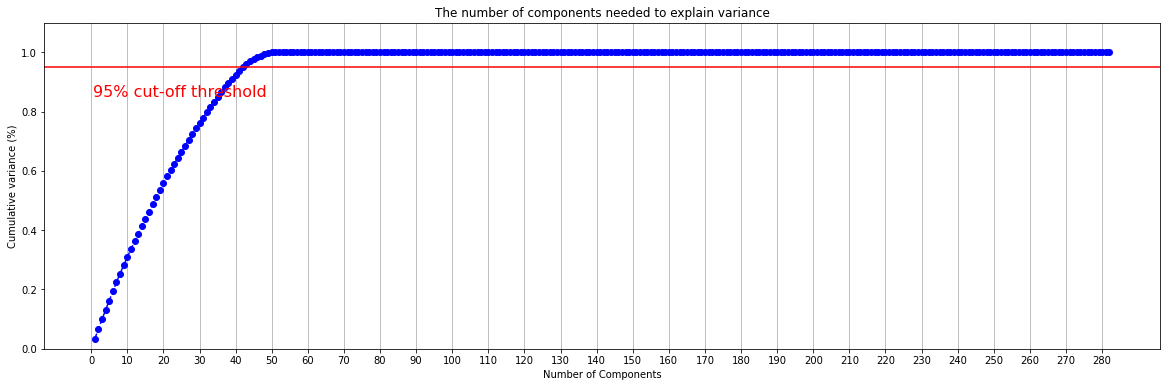

In [14]:
# Deciding n_components for PCA
data = pd.concat([train_df[num_cols], test_df[num_cols]], axis=0)
pca = PCA().fit(data)
plt.rcParams["figure.figsize"] = (20,6)

fig, ax = plt.subplots()
xi = np.arange(1, 283, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 282, step=10))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [15]:
def pca_fet(train, test, features, n_components, SEED=10):
    train_ = train[features].copy()
    test_ = test[features].copy()
    data = pd.concat([train_, test_], axis=0)
    index = data.index

    pca = PCA(n_components=n_components, random_state=SEED)
    data = pca.fit_transform(data)
    columns = [f'pca_{i + 1}' for i in range(n_components)]
    data = pd.DataFrame(data, columns=columns, index=index)
    
    train_ = data.iloc[:train.shape[0]]
    test_ = data.iloc[train.shape[0]:]
    train = pd.concat([train, train_], axis=1)
    test = pd.concat([test, test_], axis=1)
    return train, test

In [16]:
train_df, test_df = pca_fet(train_df, test_df, num_cols, n_components=40)
print("train_df: {} \ntest_df: {}".format(train_df.shape, test_df.shape))

train_df: (99918, 372) 
test_df: (50000, 372)


In [17]:
train_df['target'] = train_y.ravel()
train_df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,pca_32,pca_33,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,pca_40,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,1,0,0,0,0,0,...,3.713533,5.728371,12.006002,-1.176274,-1.989949,-2.511453,-1.569849,-1.296106,-0.912817,1
1,0,0,0,0,2,1,0,0,0,0,...,5.718580,7.679797,12.524290,-1.889649,-1.697107,12.858977,-7.232155,1.158967,-1.870781,0
2,0,0,0,0,0,0,0,0,0,2,...,10.492237,-4.758574,-4.856511,-6.055980,-4.242204,2.120024,16.973700,2.600211,-1.824318,0
3,0,0,0,0,0,0,0,3,0,0,...,-1.529440,-1.365845,0.798352,-2.057507,-1.334258,-1.152179,-0.798271,-0.828404,-2.095526,3
4,0,0,0,0,0,0,0,0,0,0,...,-1.920485,-1.481606,0.580145,-1.587914,-0.967118,-1.910530,-1.081524,-0.678428,-1.491374,1


## Save the processed datasets

In [18]:
data_dict = {}
data_dict['train_df'] = train_df
data_dict['test_df'] = test_df

file = open("./TPS_May_Dataset.txt", 'wb')
pickle.dump(data_dict, file)
file.close()